<a href="https://colab.research.google.com/github/ansonsibi1/Team_KASAR-Anson-Sibi-M4W3_Rossmann_Sales_Prediction_Capstone_Project/blob/main/Team_KASAR_Anson_Sibi_M4W3_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Steps To Follow :-\
\
1) Loading Libraries\
\
2) Loading Dataset\
2.1) Data Exploration\
\
3) Data Cleaning and Preparation\
3.1) Checked for Missing & Null Values(distplot, boxplot)\
3.2) Check columns using value_counts()\
3.3) Data Merging\
3.4) Data Extraction (Week NUmber)\
\
4) Exploratory Data Analysis\
4.1) Indepent variables vs dependent variables plot (heatmap,barplot,scatterplot)\
4.2) Hypotheisis Testing (barplot,lineplot,scatterplot)\
\
5) Feature Engineering\
5.1) Data Manipulation (Open = 0 & Sales = 0)\
5.2) Encoding (StateHoliday, StoreType, Assortment, CompetitionDistance)\
\
6) Model Selection\
6.1) Feature Selection and Train & Test Set\
6.2) Data Transformation (MinMax)\
6.3) Linear Regression Model\
6.4) Regularization & Cross Validation\
6.5) Random Forest Model (Max Depth = 8)\
6.6) Hyper Parameter Tunning\
6.7) Check Metrics, Feature Importance & Create Dataset\
\
7) Sales Prediction

# Loading Libraries :

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.simplefilter('ignore')

# Loading Datasets :

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df1 = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Rossmann Sales Prediction  - Capstone Project/Rossmann Stores Data (1).csv',parse_dates=['Date'])

In [12]:
df2 = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Rossmann Sales Prediction  - Capstone Project/store.csv')

# Data Exploration :

In [13]:
df1.shape

(1017209, 9)

In [14]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
df1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [17]:
df2.shape

(1115, 10)

In [18]:
df2.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [19]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
df2.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Data Cleaning And Preparation :

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [23]:
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [24]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [25]:
print(f"Percentage of Null Values : {(df2.CompetitionDistance.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 0.26905829596412556 %


In [26]:
print(f"Percentage of Null Values : {(df2.CompetitionOpenSinceMonth.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


In [27]:
print(f"Percentage of Null Values : {(df2.CompetitionOpenSinceYear.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 31.748878923766817 %


In [28]:
print(f"Percentage of Null Values : {(df2.Promo2SinceWeek.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


In [29]:
print(f"Percentage of Null Values : {(df2.Promo2SinceYear.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


In [30]:
print(f"Percentage of Null Values : {(df2.PromoInterval.isnull().sum()/df2.shape[0])*100} %")

Percentage of Null Values : 48.789237668161434 %


In [31]:
df2.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

In [32]:
df2[df2.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,Promo2
290,291,d,a,NaN,0
621,622,a,c,NaN,0
878,879,d,a,NaN,1


In [33]:
df2.CompetitionDistance.fillna(df2.CompetitionDistance.median(),inplace=True)

In [34]:
df = pd.merge(df1,df2,how='left',on='Store')

In [35]:
df.shape

(1017209, 13)

In [36]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0


In [37]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,1


In [38]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  object        
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  object        
 10  Assortment           1017209 non-null  object        
 11  CompetitionDistance  1017209 non-null  float64       
 12  Promo2               1017209 non-null  int64         
dt

In [40]:
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,5.005638e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,4.999999e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,0.000000e+00


In [41]:
df.StateHoliday = df.StateHoliday.apply(str)

# Exploratory Data Analysis :

Hypothesis

* Stores should sell more over the years.
* Stores should sell less on weekends.
* Stores with closer competitors should sell less.
* Store type with a larger assortment of products should sell more.
* Number of Customers should have a positive correlation with Sales.
* Stores with promotion should have high Sales.

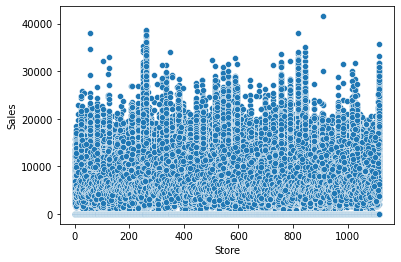

In [42]:
sns.scatterplot(df.Store,df.Sales)

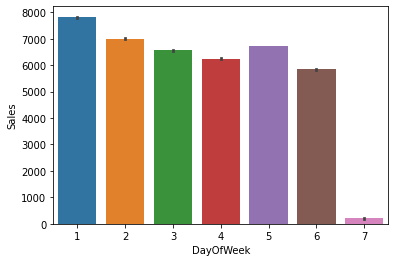

In [43]:
sns.barplot(df.DayOfWeek,df.Sales)

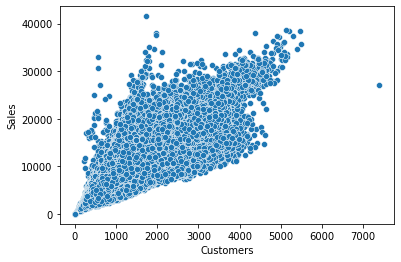

In [44]:
sns.scatterplot(df.Customers,df.Sales)

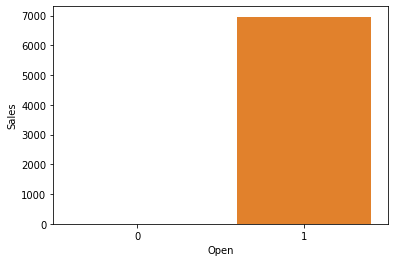

In [46]:
sns.barplot(df.Open,df.Sales)

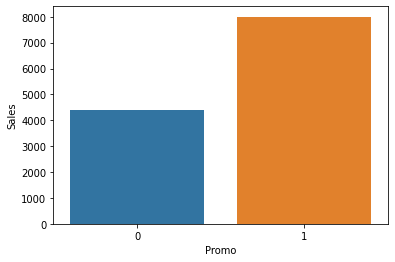

In [47]:
sns.barplot(df.Promo,df.Sales)

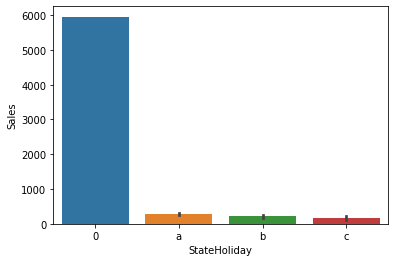

In [48]:
sns.barplot(df.StateHoliday,df.Sales)

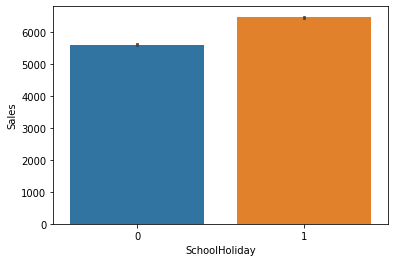

In [49]:
sns.barplot(df.SchoolHoliday,df.Sales)

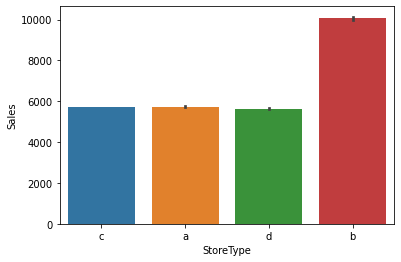

In [50]:
sns.barplot(df.StoreType,df.Sales)

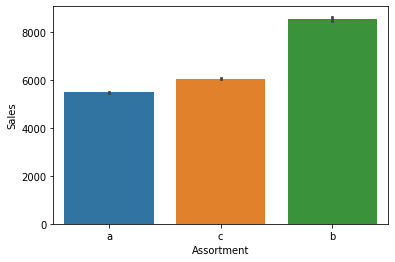

In [51]:
sns.barplot(df.Assortment,df.Sales)

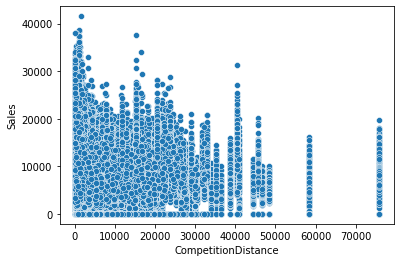

In [52]:
sns.scatterplot(df.CompetitionDistance,df.Sales)

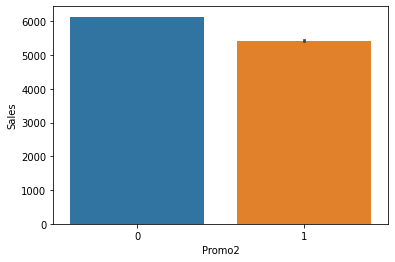

In [53]:
sns.barplot(df.Promo2,df.Sales)

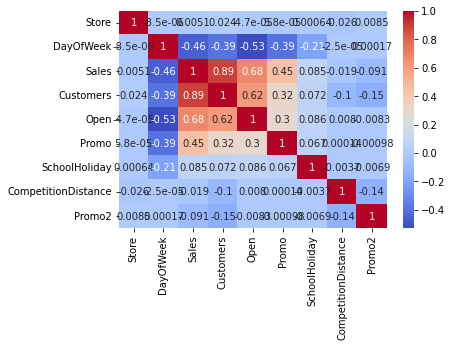

In [54]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

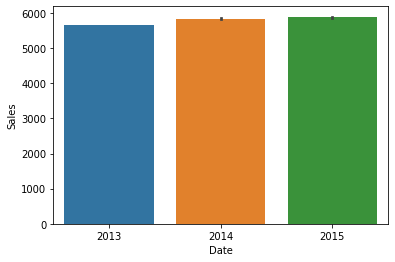

In [55]:
sns.barplot(df.Date.dt.year,df.Sales)

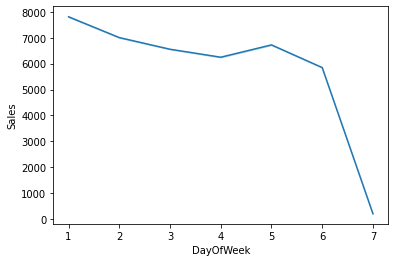

In [56]:
sns.lineplot(df.DayOfWeek,df.Sales)

In [57]:
plot_df = df.groupby(['Store'])[['Sales','CompetitionDistance']].agg({'Sales':'sum','CompetitionDistance':'mean'}).sort_values('CompetitionDistance')
plot_df

,Sales,CompetitionDistance
Store,,
516,4579807,20.0
882,5081054,30.0
1008,4179585,30.0
621,4608739,30.0
988,3683288,30.0
...,...,...
747,6261174,45740.0
110,3554993,46590.0
801,3798660,48330.0


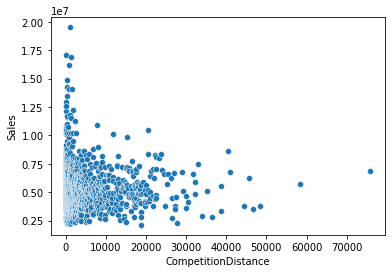

In [58]:
sns.scatterplot(plot_df.CompetitionDistance,plot_df.Sales)

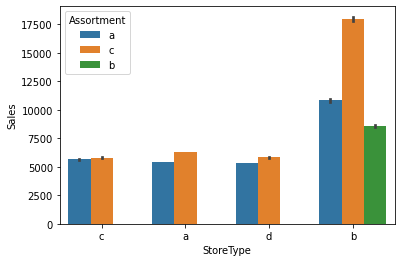

In [59]:
sns.barplot(df.StoreType,df.Sales,hue=df.Assortment)

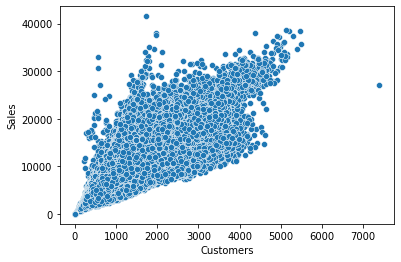

In [60]:
sns.scatterplot(df.Customers,df.Sales)